# Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight (1).csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


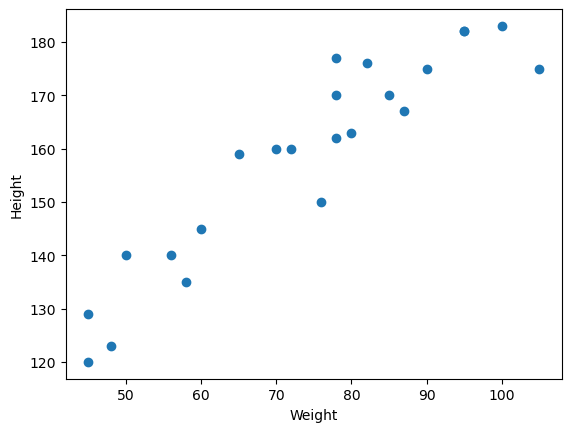

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [4]:
# Divide the dataset into independent and dependent
X = df[['Weight']] #Independent
y = df['Height'] #Dependent

In [5]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
X.shape

(23, 1)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
# Standardize the dataset Train Independent Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

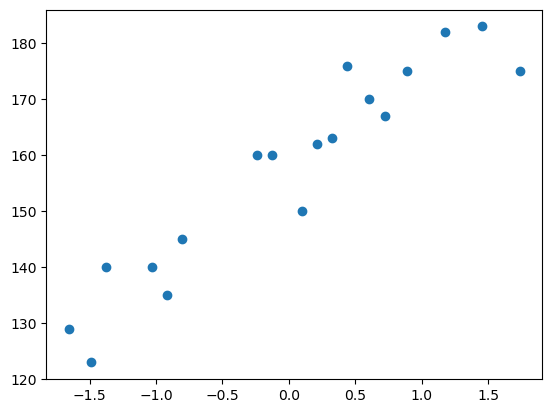

In [10]:
plt.scatter(X_train, y_train)
plt.show()

In [11]:
# Train the simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [12]:
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
print("The slope or coefficient of weight is: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

The slope or coefficient of weight is:  [17.03440872]
Intercept:  157.5


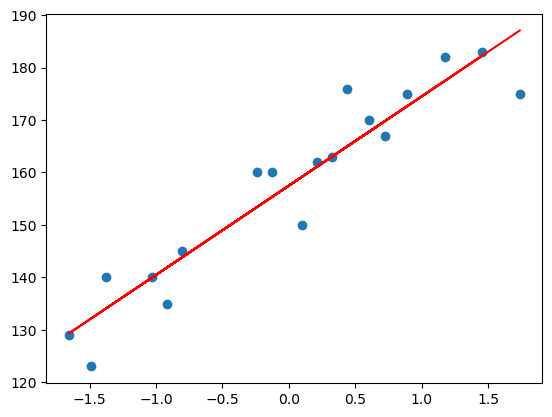

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')
plt.show()

In [15]:
y_pred_test = regressor.predict(X_test)

In [16]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

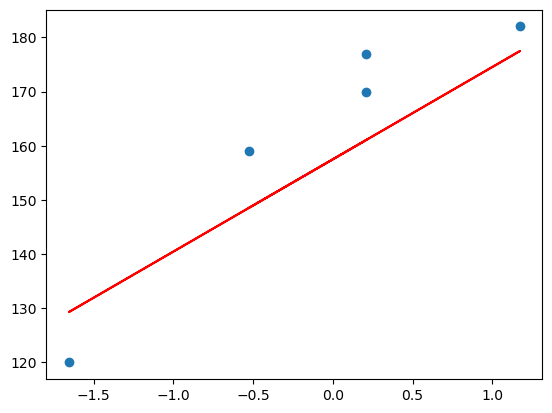

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')
plt.show()

# Performance Metrics
# MSE, MAE, RMSE
# R Square and Adjusted R Square

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
score

0.7769869860423441

In [20]:
# display adjusted r-square
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7026493147231254

In [21]:
regressor

LinearRegression()

In [22]:
# new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\Shikhaj Somani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [23]:
scaled_weight[0]

array([0.32350772])

In [24]:
print("The height prediction for weight 80kg is: ", regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is:  [163.01076266]


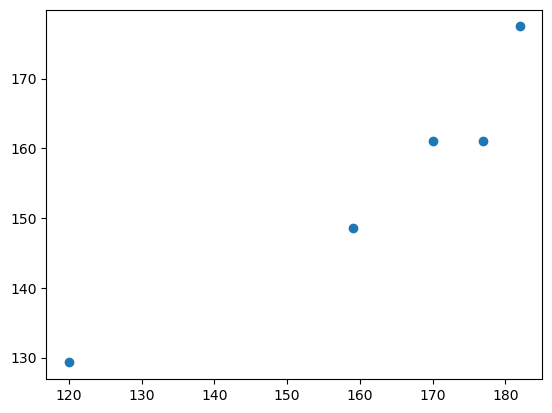

In [25]:
# Assumptions
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)
plt.show()

In [26]:
# Residuals
residuals = y_test, y_pred_test
residuals

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

C:\Users\Shikhaj Somani\AppData\Local\Temp\ipykernel_16184\3220994394.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


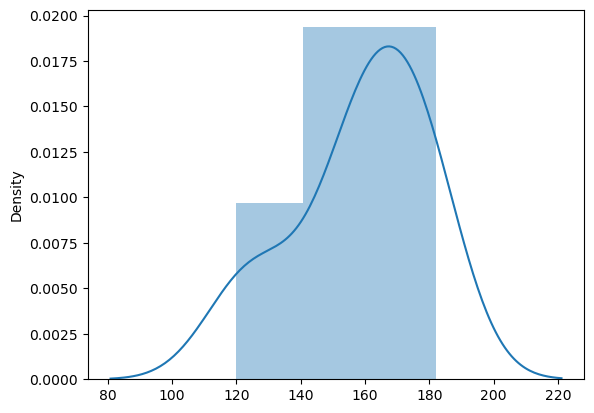

In [27]:
# Plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)
plt.show()

In [28]:
# Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test, residuals)
plt.show()

ValueError: x and y must be the same size